## CONTEXTO
Este estudo de caso tem como objetivo analisar o comportamento de compra de 2.000 consumidores que frequentam uma loja física do setor de bens de consumo de rápida movimentação (FMCG - Fast-Moving Consumer Goods). As informações foram obtidas por meio dos cartões de fidelidade utilizados no momento do checkout, garantindo assim a rastreabilidade das transações e o mapeamento dos perfis de consumo de cada indivíduo.

O conjunto de dados passou por um processo de pré-processamento, de modo que não há valores ausentes e o volume de dados foi devidamente restrito e anonimizado, em conformidade com boas práticas de segurança e privacidade das informações.

A proposta deste estudo é segmentar os consumidores com base em suas características e padrões de compra, utilizando o algoritmo K-Prototypes, que é especialmente indicado para lidar com conjuntos de dados que contêm variáveis numéricas e categóricas. A partir dessa segmentação, pretende-se identificar grupos distintos de comportamento, com o intuito de subsidiar estratégias mais eficazes de marketing, personalização de ofertas e gestão de relacionamento com o cliente.

In [1]:
# Carregando pacotes
import pandas as pd
import sys
sys.path.append('../src') 

from utils import analise_univariada_quali
from utils import analise_univariada_quanti


# Desativanod as mensagens 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando os dados
df_customers = pd.read_csv('../data/raw/segmentation_data.csv')


## Dicionário de dados

| Variável  | Tradução   | Descrição   |
| :------- | :-------- | :-------- |
| ID  | ID Consumidor    | ID único de identificação do consumidor |
| Sex   | Sexo do consumidor | 0 - Masculino 1- Feminino | 
| Marital Status   | Estado Cívil | 0 - Single (Solteiro) 1 - Non Single (não solteiro) - Divorciado, separado, casado, viúvo | 
| Age   | Idade do Consumidor | Idade do consumidor em anos |
| Education | Nível de educação | 0 - other/unknown 1- high school 2- universit 3 - graduate school |
| Income | Renda Anual do cliente | Renda Anual em dólar do consumidor|
| Ocupation | Ocupação | Categoria da ocupação do cliente 0 - unemployed / unskilled 1 - skilled employee / official 3 -management / self-employed / highly qualified employee / officer |
|Settlement size| Tamanho cidade do consumidor| 0 - small city 1 - mid-sized city 2- big city| 

In [3]:
# Verificando o tamanho do dataset
df_customers.shape

(2000, 8)

In [4]:
# Verificando dados faltantes nas váriáveis em %
df_customers.isnull().sum()/len(df_customers)*100

ID                 0.0
Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

In [5]:
# verificando os tipos das variáveis
df_customers.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

## Comentários

De acordo com os resultados das duas últimas células executadas o dataset não possui valores faltantes em nenhuma das variáveis, porém será necessário realizar o tratamento nos tipos das variáveis visto que existem variáveis categóricas que estão sendo consideradas como valor inteiro.

Nesta etapa foi realizada do drop da coluna ID - não necessária para a análise, os gráficos foram rotulados para melhor compreensão das categorias nos gráficos.
Todo o processo de limpeza do dataset se encontra no arquivo preprocess.py na qual foi gerado um novo dataset -> sementation_processed.csv



In [6]:
# Carregando o dataframe tratado
df_customersp = pd.read_csv('../data/processed/segmentation_processed.csv')

In [7]:
df_customersp.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,single,67,university,124670,skilled employee/official,big city
1,female,non-sngle,22,high school,150773,skilled employee/official,big city
2,Male,single,49,high school,89210,unemployed/unskilled,small city
3,Male,single,45,high school,171565,skilled employee/official,mid-sized city
4,Male,single,53,high school,149031,skilled employee/official,mid-sized city


In [8]:
# Verificando novamente os tipos das variáveis
df_customersp.dtypes

Sex                object
Marital status     object
Age                 int64
Education          object
Income              int64
Occupation         object
Settlement size    object
dtype: object

## Análise Univariada 

Neste tópico será realizado a análise univariada de cada uma das variáveis

Descrição da Variável categórica


,count,unique,top,freq
Sex,2000,2,Male,1086


Tabela de frequência dos níveis da variável: Sex


,Sex,Frequencia,Percentual %
0,Male,1086,54.3
1,female,914,45.7
2,Total,2000,100.0


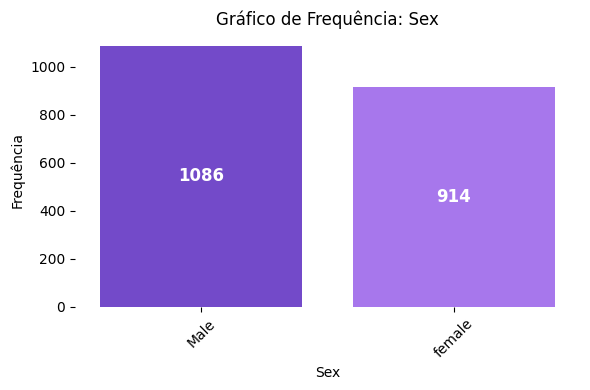

In [9]:
analise_univariada_quali(df_customersp, 'Sex')

Descrição da Variável categórica


,count,unique,top,freq
Marital status,2000,2,single,1007


Tabela de frequência dos níveis da variável: Marital status


,Marital status,Frequencia,Percentual %
0,single,1007,50.35
1,non-sngle,993,49.65
2,Total,2000,100.00


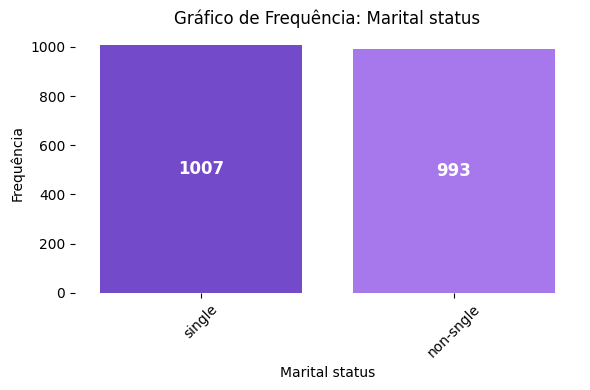

In [10]:
analise_univariada_quali(df_customersp, 'Marital status')

Descrição da Variável categórica


,count,unique,top,freq
Education,2000,4,high school,1386


Tabela de frequência dos níveis da variável: Education


,Education,Frequencia,Percentual %
0,high school,1386,69.30
1,university,291,14.55
2,other/unknown,287,14.35
3,graduate school,36,1.80
4,Total,2000,100.00


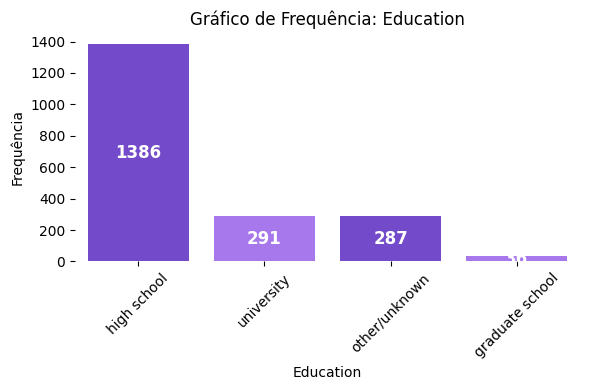

In [11]:
analise_univariada_quali(df_customersp, 'Education')

Descrição da Variável categórica


,count,unique,top,freq
Occupation,2000,3,skilled employee/official,1113


Tabela de frequência dos níveis da variável: Occupation


,Occupation,Frequencia,Percentual %
0,skilled employee/official,1113,55.65
1,unemployed/unskilled,633,31.65
2,management/highly qualified employee,254,12.70
3,Total,2000,100.00


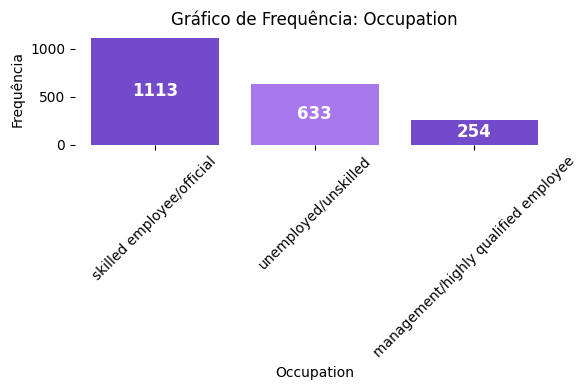

In [12]:
analise_univariada_quali(df_customersp, 'Occupation')

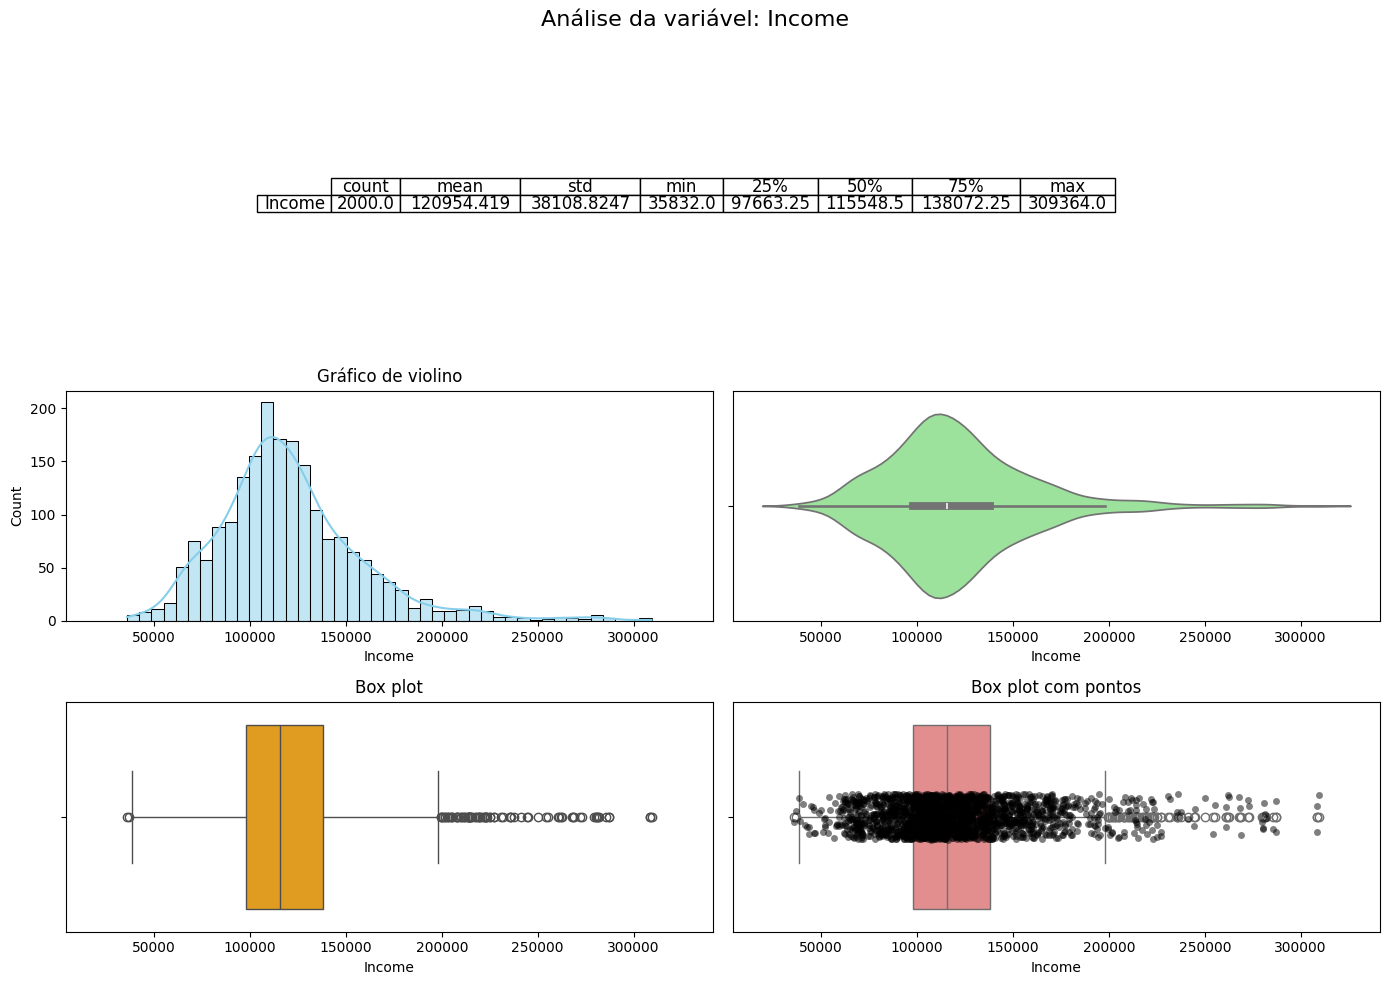

In [13]:
analise_univariada_quanti(df_customersp, 'Income')

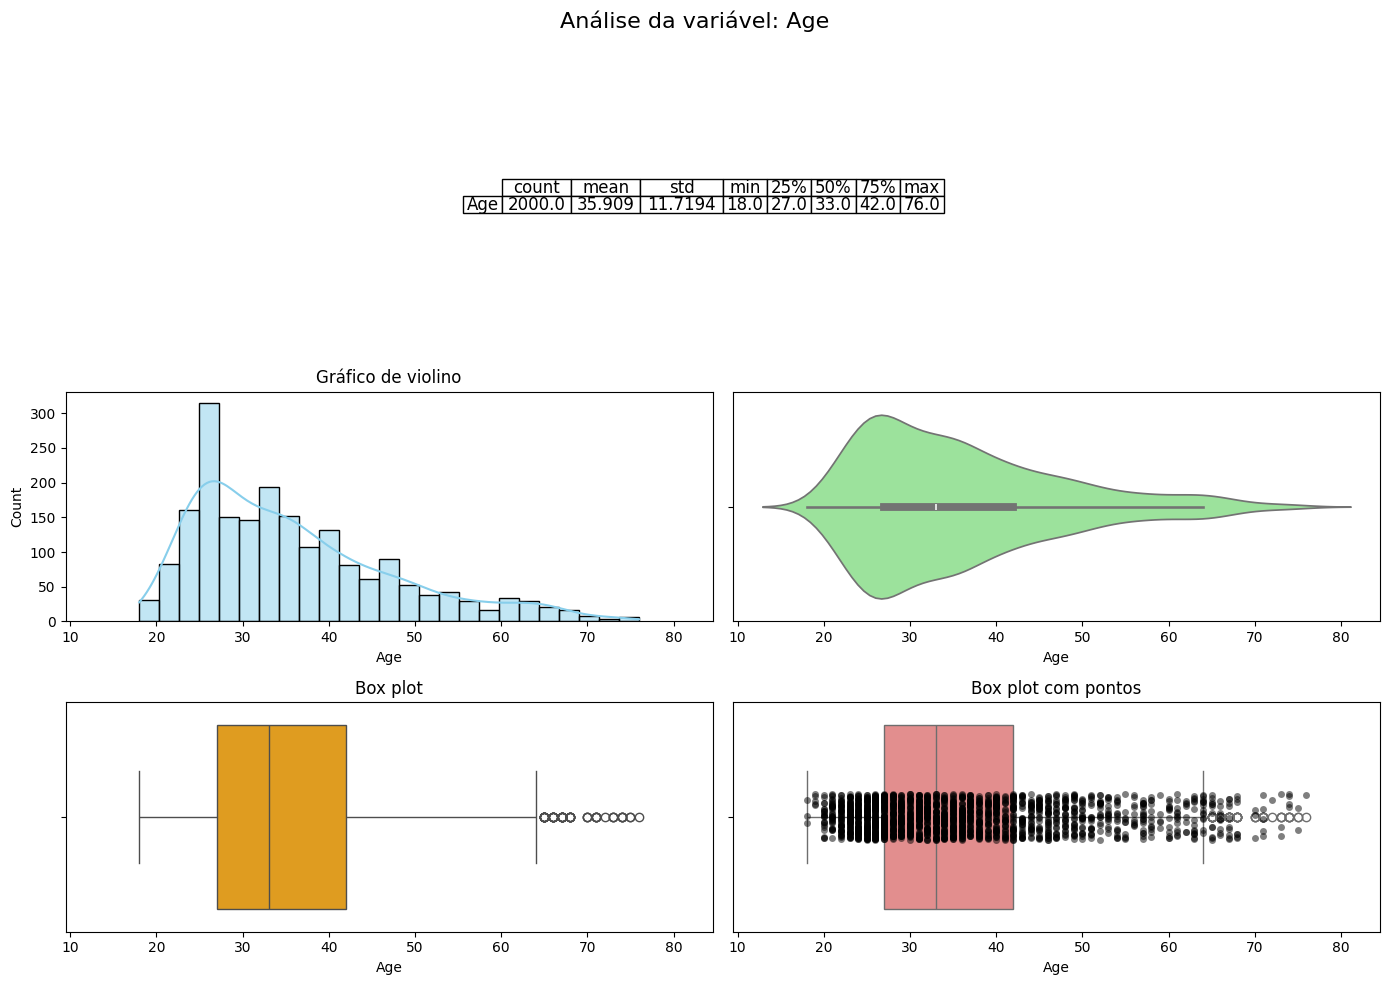

In [14]:
analise_univariada_quanti(df_customersp, 'Age')